# Project: Investigating a No-show Appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

In this project I will analyze data from 100K medical appointments in Brazil. The data source utilized was the database "No-show appointments" from Kaglee. First, I will review the dataset to fix issues and prepare the data for analysis. Then, I will look for characteristics that help predict if a patient will show up for their scheduled appointment. Finally, I will analyze if there are any differences between those who show-up to their medical appointments and those who don't.


In [14]:
# The following packages will be used for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

The original dataset had 110527 entries and 14 columns. Neither missing observations nor duplicates were found. The average age of patients is 37 years old and less than ten percent is enrolled in the program Bolsa Familia. Other variables show that almost twenty percent of patients suffer hipertension, seven percent have diabetes and three percent are alcoholics. Although the names are relatable, the exact definition of handcap or SMS_received weren't found. In addition, there are five classes of handcap and most patients seem to score zero. As well, thirty-two percent of patients seem to have received (or sent) SMS. 


First Step: We import data "noshowappointments" from kaggle. 

In [15]:
# Load data noshowappointments from kaggle
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Inspect the variables to make sure there are not problems and that the quantitative variables have numeric class so we can make calculations

In [16]:
# Now we inspect the data structure to check if data have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Verfiy there are not duplicates

In [17]:
#Check for duplicates
sum(df.duplicated())

0

Analyze the characteristics of the sample. First we can notice the average age is 37, then that less than 10% have insurance, almost 20% have hipertension and abput 7% have diabetes.

In [18]:
#Look for outliers and problems with the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Confirm there are not problems with the outliers in the variable age

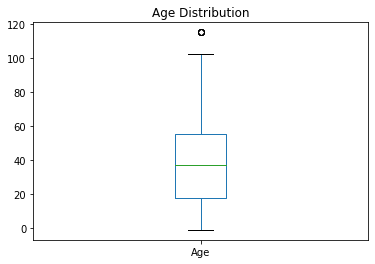

In [19]:
#Apparently age have outliers. Confirm this to remove them.

df['Age'].astype(int).plot(kind='box', title='Age Distribution');

### Data Cleaning

Variable age was investigated to look for outliers. Initially, a box plot show that a patient is 115 years old as an outlier. Nevertheless, Brazil current oldest habitant is older than that. On the other hand, there is one patient who is minus 1 year old. Since newborn are considered zero years old, then nobody can be minus 1 year old. Hence, this was the only observation to be dropped. No other issues were found and column No-show was rename to align the labeling and avoid problems. 

Variables that definitely won't be used for analysis were dropped. Histograms confirms our initial findings in the summary statistics. Most patients seem to be between 18 and 55 years old. Alcoholism, Diabetes, Hipertension, Scholarship and SMS_received are binary. Variables age, scholarship, and SMS_received seem have enough variability to help us investigate possible predictors for medical appointment No-show. Finally, the dependent variable seems to be fine and a bar chart shows that around twenty percent of patients do not show up to their medical appointments.


In [20]:
#Create a new dataframe removing the patient who is less than zero years old.
df_no = df.query('Age >= 0') 
df_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [21]:
#Since most variables do not have spaces or dashes, rename variable No-show for alignment and to avoid issues
df_clean=df_no.rename(index=str, columns={'No-show':'No_show'})

In [22]:
#Drop variables that won't have any use
df_clean.drop(["AppointmentDay", "ScheduledDay", "AppointmentID"], axis=1, inplace=True)
df_clean.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Check Distributions to see variables that clearly are worth analysis and have much variations such as age, SMS_received and Scholarship

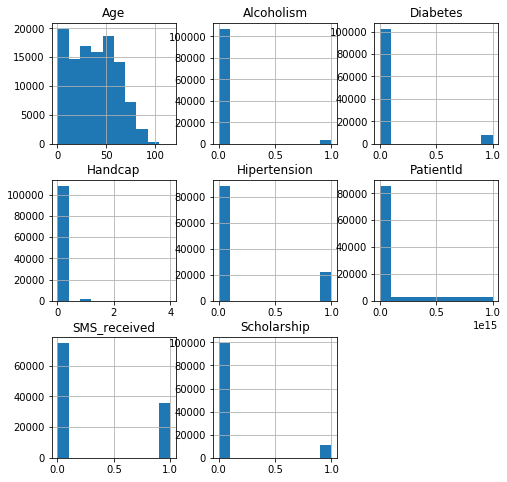

In [23]:
#Check distributions
df_clean.hist(figsize=(8, 8));

Those who attend the appointment are labeled as "No" (No no-show) and those who don't show up are labeled "Yes" (Yes no-show)

In [24]:
#Check Dependent Variable: No_show
df_clean['No_show'].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

### bar plot 

The bar below shows the proportion of patients that attend the appointment versus those who don't attend the appointment


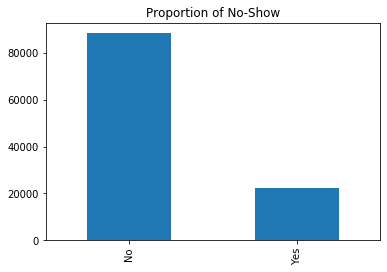

In [25]:
#See the proportion of those who "No-show" and those who "Show up" the appointment
df_clean['No_show'].value_counts().plot(kind='bar', title='Proportion of No-Show');

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : What factors are important to predict if a patient will show up for their scheduled appointment?

Those who shoup-up are in average 37.8 years old and those who don't 34.3 years old. The difference is not that big to imply that age has an effect in the no-show outcome. Perhaps variable age has to be analyzed in other cuts or combined with other variables to see if age has a relevant impact in the patients assistance to their medical appointments.
In the case of gender, more women show-up to their appoitments than men, but the same is true for those who don't attend. This is because the sample has more females than males. The bar chart shows that proportionally, there is almost not difference in gender between those who show-up and those who don't, and the values confirm that the difference is less than one percentage points. 
Regarding the program "Bolsa Familia", the bar chart shows that proportionally, those in the program have a higher rate of no-show. Comparing the values, the difference is almost of four percentage points, which is not huge but shows some difference.
The association between SMS_received and No-show is unusual -assuming that those who scored 1 for SMS_received, received a text message reminder for the appointment. Hence, twenty-seven percent of those who scored 1 did not show up against a sixteen percent of those who didn't show and scored 0 for SMS_received. Perhaps, those who received SMS was the only way of communication agains a phone call, emails or other type of communication.

First we investigate Age. We can see that the average age of those that show-up is 38 years old while those who don't show up are on average are 34 years old.

In [26]:
#Investigate Age
df_01 = df_clean.groupby('No_show').Age.mean()
df_01

No_show
No     37.790504
Yes    34.317667
Name: Age, dtype: float64

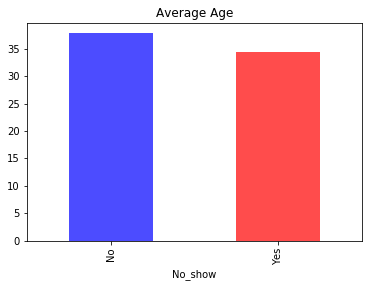

In [27]:
df_clean.groupby('No_show').Age.mean().plot(kind='bar', title='Average Age', color=['blue', 'red'], alpha=.7);

Then we investigate "No_show" by Gender. We can see that those who show up are mainly females. However, we can see that our sample has more females than males. Hence the bar below shows that proportionally, there is not much difference between genders in terms of attendance.

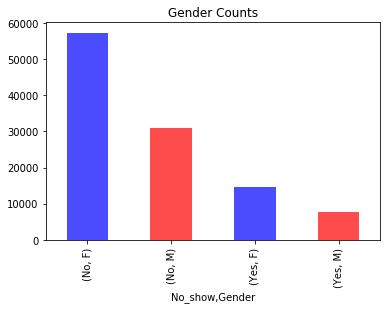

In [28]:
#Investigate Gender
df_clean.groupby('No_show')['Gender'].value_counts().plot(kind='bar', title='Gender Counts', color=['blue', 'red'], alpha=.7);

In [29]:
#Check values
df_clean.groupby('No_show')['Gender'].value_counts()

No_show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

Proportionally, those who don't have bolsa familia seem to show-up more than those who are part of the program.

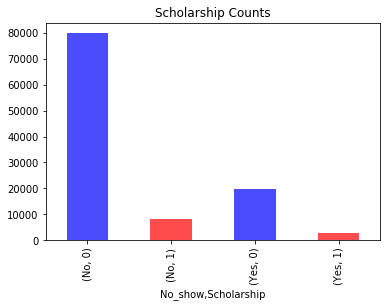

In [30]:
#Investigate the impact of program "Bolsa Familia"
df_clean.groupby('No_show')['Scholarship'].value_counts().plot(kind='bar', title='Scholarship Counts', color=['blue', 'red'], alpha=.7);

In [31]:
#Check the impact of program "Bolsa Familia" in numbers
df_clean.groupby('No_show')['Scholarship'].value_counts()

No_show  Scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
Name: Scholarship, dtype: int64

Proportionally, those who didn't receive a SMS show-up to the appointment in a bigger proportion than those who received. Nevertheless, among those who didn't show-up, it seems that the difference between receiving or not an SMS didn't impact much

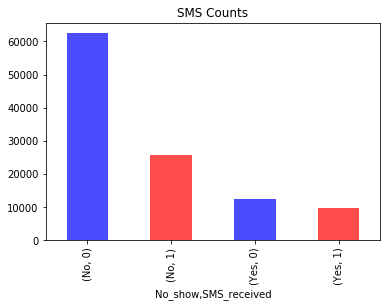

In [32]:
#Ivestigate the impact of SMS_received
df_clean.groupby('No_show')['SMS_received'].value_counts().plot(kind='bar', title='SMS Counts', color=['blue', 'red'], alpha=.7);

In [33]:
#Check values
df_clean.groupby('No_show')['SMS_received'].value_counts()

No_show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: SMS_received, dtype: int64

### Research Question 2 : Are there any difference between those who show-up to their medical appointments and those who didn't?

Those who show up to their medical appointment were older than those who didn't show up. Also, women are regularly older than men in old groups. Our summaries confirmed that, compared to those who didn't show up, show-up patients are less likely to be in the program Bolsa Familia, suffer more of hypertension and diabetes and scored zero for SMSs. 
Interestingly, it seems that score 0 or 1 for SMS_received does not impact much on those who didn't show up. Furthermore, among those who didn't show up to receive a SMS or not didn't impact on those in the program Bolsa Familia. 


In [34]:
#Split the dataset into two subsets: those who show and those who don't show up to their medical appointments
#Start who those that show up
df_show = df_clean.query('No_show=="No"') 
df_show.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,8.820700e+04,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000
mean,1.476809e+14,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337
std,2.563739e+14,23.338645,0.291697,0.403261,0.261508,0.171733,0.162751,0.454381
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.168386e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.176138e+13,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433684e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [35]:
#Create the dataset for those who didn't show up to their medical appointments
df_noshow = df_clean.query('No_show=="Yes"') 
df_noshow.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,1.467523e+14,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,2.549905e+14,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,5.628261e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176779e+12,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.156794e+13,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.454270e+13,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [36]:
#Check association among other dependent variables such as gender and age
df_clean.query('Gender=="F"')['Age'].median(), df_clean.query('Gender=="M"')['Age'].median()

(39.0, 33.0)

In [37]:
#Check association between gender and age for those who show
df_show.query('Gender=="F"')['Age'].median(), df_show.query('Gender=="M"')['Age'].median()

(40.0, 34.0)

In [38]:
#Check association between gender and age for those who didn't show
df_noshow.query('Gender=="F"')['Age'].median(), df_noshow.query('Gender=="M"')['Age'].median()

(34.0, 28.0)

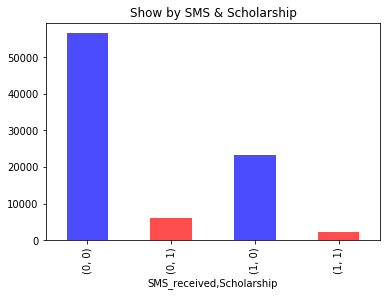

In [39]:
#Investigate variable SMS_received and Scholarship for those who show-up
df_show.groupby('SMS_received')['Scholarship'].value_counts().plot(kind='bar', title='Show by SMS & Scholarship', color=['blue', 'red'], alpha=.7);

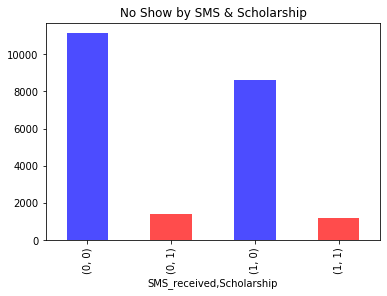

In [40]:
#Investigate variable SMS_received and Scholarship for those no-show
df_noshow.groupby('SMS_received')['Scholarship'].value_counts().plot(kind='bar', title='No Show by SMS & Scholarship', color=['blue', 'red'], alpha=.7);

<a id='conclusions'></a>
## Conclusions

Overall, those who do not show up are younger than the average age. Also, women are older than men in this sample so then, more evidence is needed to associated women with showing up -or not- to appointments. Very few patients are part of the program Bolsa Familia. Nevertheless, those in the program show less to their medical appoinments, proportionally compared to those who are not in the program. The exact definition of variable SMS_received was not found. However, those who scored 1 -and that we presumed received a SMS regarding the appoitment- are more likely to no-show to their medical appointments compared -proportionally- to those who did nto received a SMS. 
